# Feature engineering

## feature tools
- https://featuretools.alteryx.com/en/stable/getting_started/using_entitysets.html

## pycaret
- https://pycaret.org/preprocessing/

## scikit-learn    
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing 

## scikit-learn categorical encoder
- https://contrib.scikit-learn.org/category_encoders/ 

## A Short Guide for Feature Engineering and Feature Selection
- https://github.com/ashishpatel26/Amazing-Feature-Engineering

## O'Relly book : feature_engineering_for_machine_learning
- https://www.repath.in/gallery/feature_engineering_for_machine_learning.pdf

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

- Filtering Methods - Select subsets of variables as a pre-processing step, independently of the chosen predictor.
- Wrapper Methods - Utilize the learning machine of interest as a black box to score subsets of variable according to their predictive power.
- Embedded Methods - Perform variable selection in the process of training and are usually specific to given learning machines.

## SVM-Anova: SVM with univariate feature selection
https://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html

In [7]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape
SelectPercentile(chi2, percentile=70).fit_transform(X, y).shape
SelectKBest(chi2, k=2).fit_transform(X, y).shape

(150, 4)

(150, 3)

(150, 2)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
np.random.seed(0)
X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))
clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto")),
               ])
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)
X.shape

(150, 40)

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=1,
                                  score_func=<function chi2 at 0x0000017086CF6820>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=3,
                                  score_func=<function chi2 at 0x0000017086CF6820>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=6,
                                  score_func=<function chi2 at 0x0000017086CF6820>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(score_func=<function chi2 at 0x0000017086CF6820>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=15,
                                  score_func=<function chi2 at 0x0000017086CF6820>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=20,
                                  score_func=<function chi2 at 0x0000017086CF6820>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=30,
                                  score_func=<function chi2 at 0x0000017086CF6820>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=40,
                                  score_func=<function chi2 at 0x0000017086CF6820>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=60,
                                  score_func=<function chi2 at 0x0000017086CF6820>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=80,
                                  score_func=<function chi2 at 0x0000017086CF6820>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('anova',
                 SelectPercentile(percentile=100,
                                  score_func=<function chi2 at 0x0000017086CF6820>)),
                ('scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

<Figure size 1440x360 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, '추출된(카이제곱) 특성변수 개수에 따른 SVM-Anova 성능도')

([<matplotlib.axis.XTick at 0x171000c4c40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'Percentile')

Text(0, 0.5, 'Accuracy Score')

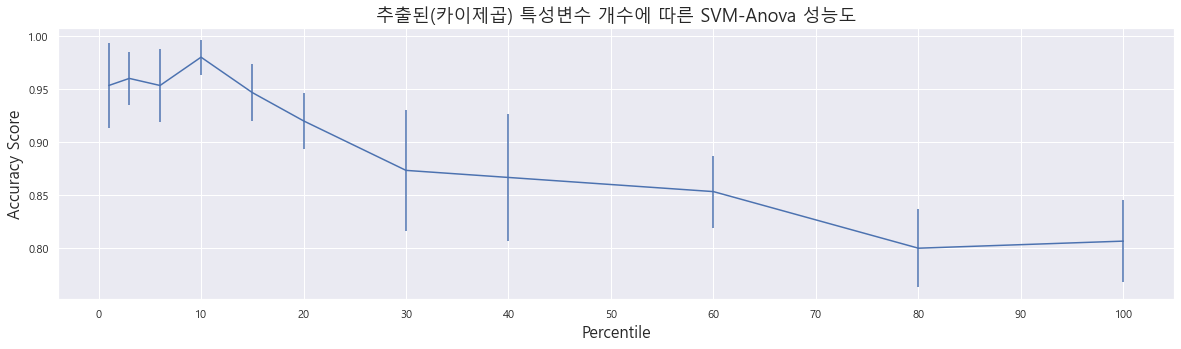

In [9]:
for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.figure(figsize=(20,5))
plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title('추출된(카이제곱) 특성변수 개수에 따른 SVM-Anova 성능도', fontsize=18)
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=16)

## 1. 데이터 읽기
### kaggle('../data/creditcard.csv'')로 search
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [10]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='CreditCardFraudDetection')
df = pd.DataFrame(data.data, columns=data.feature_names)
# #df = pd.read_csv("../data/creditcard.csv") # from kaggle
df['target'] = data.target
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [11]:
df = df.sample(frac=0.1)
X = df.drop(['Time', 'Amount', 'target'], axis=1)
y = df['target']

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif
X.shape
X_new = SelectKBest(f_classif, k=5).fit_transform(X, y)
X_new.shape

[SelectKBest(f_classif, k=cols).fit_transform(X, y).shape[1] for cols in [3,5,7,9,11,13,15]]

(28481, 28)

(28481, 5)

[3, 5, 7, 9, 11, 13, 15]

In [13]:
SelectKBest().get_params()

{'k': 10,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

## Recursive feature elimination with cross-validation
### target에 영향을 주는 특성변수 selection method
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [14]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

svc = SVC(kernel="linear")
min_features_to_select = 1 # 최소로 선택할 특성변수 개수
rfecv = RFECV(estimator=svc, step=1, 
              cv=StratifiedKFold(3),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)

rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=SVC(kernel='linear'), scoring='accuracy')

In [15]:
print(f'최적 특성변수는 총 {len(X)}개 중에서 {rfecv.n_features_}개')
print('특성변수의 순위는 : ')
rfecv.ranking_
rfecv.get_support()
X.loc[:, rfecv.get_support()].columns

최적 특성변수는 총 28481개 중에서 5개
특성변수의 순위는 : 


array([ 1,  5,  9, 11, 20, 24, 18,  7,  1,  1, 17,  8,  3,  1, 10,  2,  1,
        4,  6, 16, 13, 19, 21, 23, 14, 22, 15, 12])

array([ True, False, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False])

Index(['V1', 'V9', 'V10', 'V14', 'V17'], dtype='object')

Text(0.5, 0, '선택된 특성변수의 개수')

Text(0, 0.5, '교차검증 평균정확도(Accuracy)')

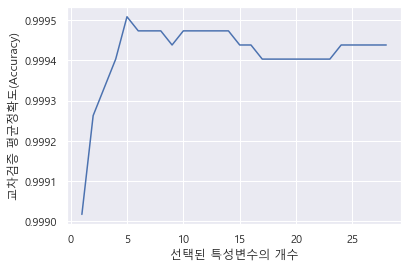

In [16]:
# Plot number of features VS. cross-validation scores
plt.plot(range(min_features_to_select, 
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.xlabel('선택된 특성변수의 개수')
plt.ylabel('교차검증 평균정확도(Accuracy)')

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
clf = Pipeline([('feature_selection', rfecv), 
                ('classification', svc)
               ])
y_pred = clf.fit(X, y).predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28431
         1.0       0.95      0.78      0.86        50

    accuracy                           1.00     28481
   macro avg       0.98      0.89      0.93     28481
weighted avg       1.00      1.00      1.00     28481



## 특성추출 및 선택
## 1. Filtering Methods
- Filter methods uses univariate statistics to evaluate whether there is a statistically significant relationship from each input feature to the target feature (target variable/dependent variable) — what we are attempting to predict.
- Advantages
         * Robust against overfitting (introduces bias)
         * Much faster than wrapper methods
- Disadvantages
         * Does not consider interactions between other features
         * Does not consider the model being employed

<img src='https://miro.medium.com/max/500/0*fjJfgmQHgcT3NOc2'>

## Feature selection
### 가. Removing features with low variance

In [18]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.7)
sel.fit(X)
sel.get_support()
X.loc[:, sel.get_support()].columns

VarianceThreshold(threshold=0.7)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16'],
      dtype='object')

In [19]:
pd.DataFrame(sel.fit_transform(X), columns = X.loc[:, sel.get_support()].columns)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,1.600514,-0.853244,-0.993279,1.032345,0.029043,0.846244,-0.366227,0.177129,0.649900,0.286487,-0.128397,0.669756,0.469240,0.129446,0.198561,1.000447
1,-1.501197,0.482647,1.939166,0.881938,-0.201387,0.470977,-0.508311,0.886026,-0.313747,-0.405070,0.237952,0.474609,-0.128297,0.304285,0.429261,0.454783
2,-0.414060,0.978915,-0.873859,4.983313,0.532468,1.341700,3.390867,-1.495876,-1.271300,1.433660,0.309489,-1.115917,1.077233,-4.045450,0.649536,0.506890
3,-1.944804,1.358311,1.260984,-0.088213,-2.282017,0.903853,0.489231,0.169532,0.758750,0.248219,-0.408857,-0.208690,-0.056050,-0.386241,1.781237,0.578382
4,-1.960527,1.185463,-0.284360,-2.387371,-0.877436,-0.579237,-0.530803,0.987875,-0.832956,0.170230,-1.323685,-0.071426,1.030957,-0.128074,-0.778312,1.439932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28476,-1.878620,0.917236,0.442278,-1.128513,-0.563680,-1.346478,-0.223243,0.847915,-0.299178,-0.448069,1.116031,0.900186,-0.307402,0.802057,-0.305914,0.889828
28477,-1.117292,0.045965,1.053005,0.027576,-0.884504,0.009229,-0.172258,0.549695,0.947768,-0.753968,-1.541130,0.667923,0.377953,-0.576787,-1.063107,-0.213015
28478,2.067052,0.010130,-1.909441,0.198803,0.602713,-0.307927,-0.010848,0.010430,0.450517,-0.172722,0.491250,0.032901,-1.143378,-0.436734,-0.327386,0.710764
28479,1.616376,-1.323049,-1.000158,0.357426,0.154551,2.143537,-0.812841,0.566534,-0.387038,0.854878,0.435755,0.955485,0.326811,0.050291,-0.247875,-1.934333


### 나. 상관계수 (Pearson correlation)

In [20]:
feature_name = X.columns
best_features = 15

In [21]:
def corr_selector(X, y):
    cor_list = []
    for i in X.columns:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    cor_feat = X.iloc[:, np.argsort(np.abs(cor_list))[best_features*-1:]].columns.tolist()
    cor_support = [True if i in cor_feat else False for i in feature_name]
    return cor_feat, cor_support
corr_feature, corr_support = corr_selector(X, y)
'/'.join(corr_feature)

'V6/V5/V2/V1/V9/V18/V4/V11/V7/V3/V16/V10/V12/V14/V17'

### 다. 카이제곱

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
def Chi_selector(X, y):
    chi_selector = SelectKBest(chi2, k=best_features)
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:, chi_support].columns.tolist()
    return chi_feature, chi_support
chi_feature, chi_support = Chi_selector(X, y)
','.join(chi_feature)

'V1,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19'

## 2. Wrapper Methods
- Wikipedia describes Wrapper methods as using a “predictive model to score feature subsets. Each new subset is used to train a model, which is tested on a hold-out set. Counting the number of mistakes made on that hold-out set (the error rate of the model) gives the score for that subset.”
— Wrapper Methods Wikipedia. The algorithms employed by wrapper methods are referred to as greedy because the attempt to find the optimal combination of features that results in the best performing model.
- “Wrapper feature selection methods create many models with various different subsets of the input features and select those features that result in the best performing model according to some performance metric.” — Jason Brownlee

- Advantages
               * Able to detect the interactions that takes place between features
               * Often results in better predictive accuracy than filter methods
               * Finds the optimal feature subset
- Disadvantages
               * Computationally expensive
               * Prone to overfitting
<img src='https://miro.medium.com/max/700/0*bbF5HeycNCV0qNmg'>

### 라. RFE(recursive feature elimination)

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
def Wrapper_RFE(X, y):
    lasso_selector = RFE(estimator=LogisticRegression(solver='saga', penalty='l1'), 
                        n_features_to_select=best_features, step=20)
    X_norm = MinMaxScaler().fit_transform(X)
    lasso_selector.fit(X_norm, y)
    lasso_support = lasso_selector.get_support()
    lasso_feature = X.loc[:,lasso_support].columns.tolist()
    return lasso_support, lasso_feature
lasso_support, lasso_feature = Wrapper_RFE(X, y)
','.join(lasso_feature)

'V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V16,V28'

### Embedded Methods 
- are similar to Wrapper methods because this method also optimizes an objective function of a predictive model, but what separates the two methods is that in embedded methods, there is an intrinsic metric used during learning to build the model. Therefore, Embedded methods requires a supervised learning model which in turn will intrinsically determine the importance of each feature for predicting the target feature.
<img src='https://media.istockphoto.com/photos/closeup-electric-green-embedded-microcircuits-in-production-picture-id1320351813?b=1&k=20&m=1320351813&s=170667a&w=0&h=ofwLbm30fBrfpZFyDPJvkTP7n15oi6FawrJ2zQllmis='>

### 마. SelectFromModel

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
def random_forest(X, y):
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(), 
                                          threshold='median')
    embeded_rf_selector.fit(X, y)    
    embeded_rf_support = embeded_rf_selector.get_support()
    embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
    return embeded_rf_support, embeded_rf_feature

embeded_rf_support, embeded_rf_feature = random_forest(X, y)
'/'.join(embeded_rf_feature)

'V1/V2/V3/V4/V7/V9/V10/V11/V12/V14/V16/V17/V18/V20'

### Lassso
LASSO (Least Absolute Shrinkage and Selection Operator) is a good example of an embedded method. Wikipedia describes LASSO as “a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.” Going into depth about how LASSO works is beyond the scope of this article but a good article to get to grips with the algorithm can be found on Analytics Vidhya blog by Aarshay Jain,  titled A Complete Tutorial on Ridge and Lasso Regression in Python.

In [28]:
# train model
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X, y)
# perform feature selection
kept_cols = [feature for feature, weight in zip(X.columns.values, lasso.coef_) if weight != 0]
kept_cols

Lasso(alpha=0.01)

['V3', 'V10', 'V12', 'V14', 'V17']

https://towardsdatascience.com/getting-started-with-feature-selection-3ecfb4957fd4

In [29]:
figt = go.Figure(
         go.Waterfall(name= "Lasso Coefficients",
                      orientation= "h",
                      y = X.columns.values,
                      x = lasso.coef_))
fig.update_layout(title = "Coefficients of Lasso Regression Model")
fig.show()

NameError: name 'go' is not defined

### 종합 평점

Text(0.5, 1.0, 'Variance_Feature seletion method')

([], [])

Text(0.5, 1.0, 'Pearson_Feature seletion method')

([], [])

Text(0.5, 1.0, 'Chi-2_Feature seletion method')

([], [])

Text(0.5, 1.0, 'RFE_Feature seletion method')

([], [])

Text(0.5, 1.0, 'RF_Feature seletion method')

([], [])

Text(0.5, 1.0, 'RFECV_Feature seletion method')

([], [])

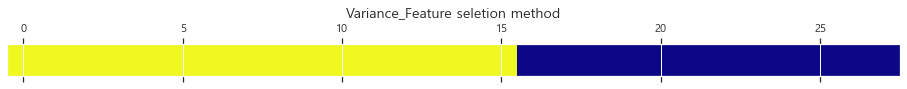

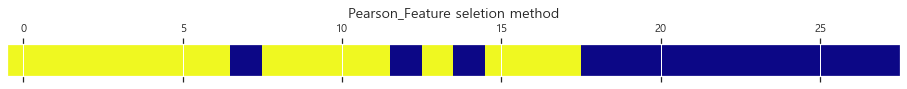

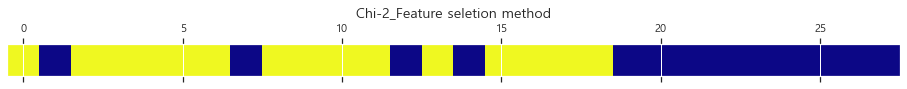

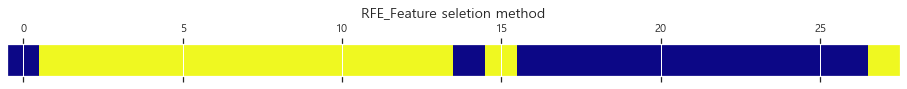

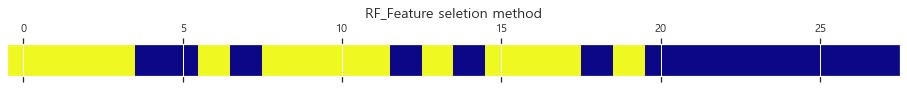

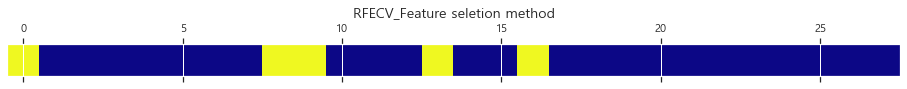

In [54]:
features = {'Variance':sel.get_support(),'Pearson':corr_support, 'Chi-2':chi_support, 
            'RFE':lasso_support, 'RF':embeded_rf_support, 'RFECV': rfecv.get_support()}
for key, value in features.items() :
    plt.matshow(np.array(value).reshape(1, -1), cmap='plasma')
    plt.title(key + '_Feature seletion method', fontsize='14')
    plt.yticks(())

<AxesSubplot:xlabel='변수명'>

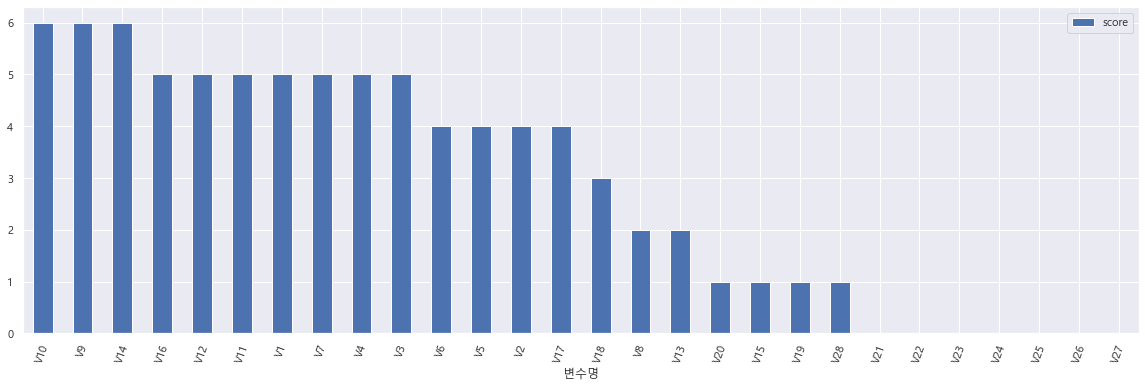

In [55]:
rank = pd.DataFrame(features)
rank['변수명'] = feature_name
rank['score'] = rank.sum(1)
rank.set_index('변수명', inplace=True)
rank.sort_values('score', ascending=False).plot(kind='bar', rot = '70', figsize = (20, 6))

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5]),
 [Text(0.5, 0, 'V1'),
  Text(2.5, 0, 'V3'),
  Text(4.5, 0, 'V5'),
  Text(6.5, 0, 'V7'),
  Text(8.5, 0, 'V10'),
  Text(10.5, 0, 'V12'),
  Text(12.5, 0, 'V16'),
  Text(14.5, 0, 'V18')])

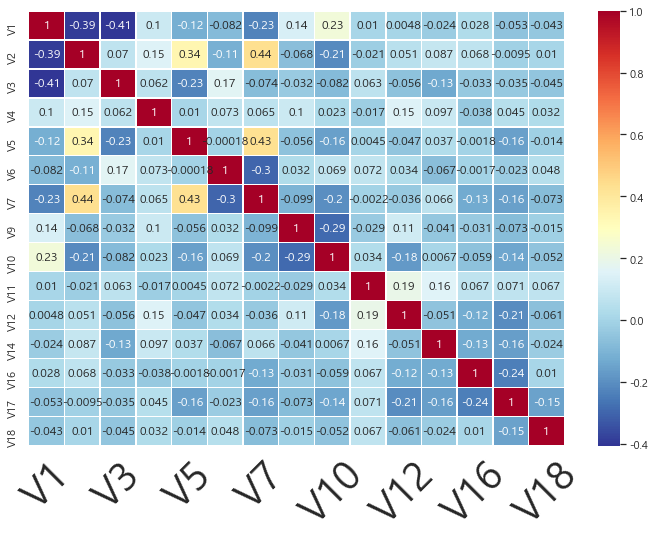

In [63]:
X = X[rank[rank['score'] >= 3].index]
corr_matrix = X.corr(method = "spearman")
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(data = corr_matrix, annot = True, linewidths=.5, cmap='RdYlBu_r', ax=ax)
plt.xticks(rotation=45)

<AxesSubplot:>

Text(0.5, 1.0, 'X와 y의 상관관계')

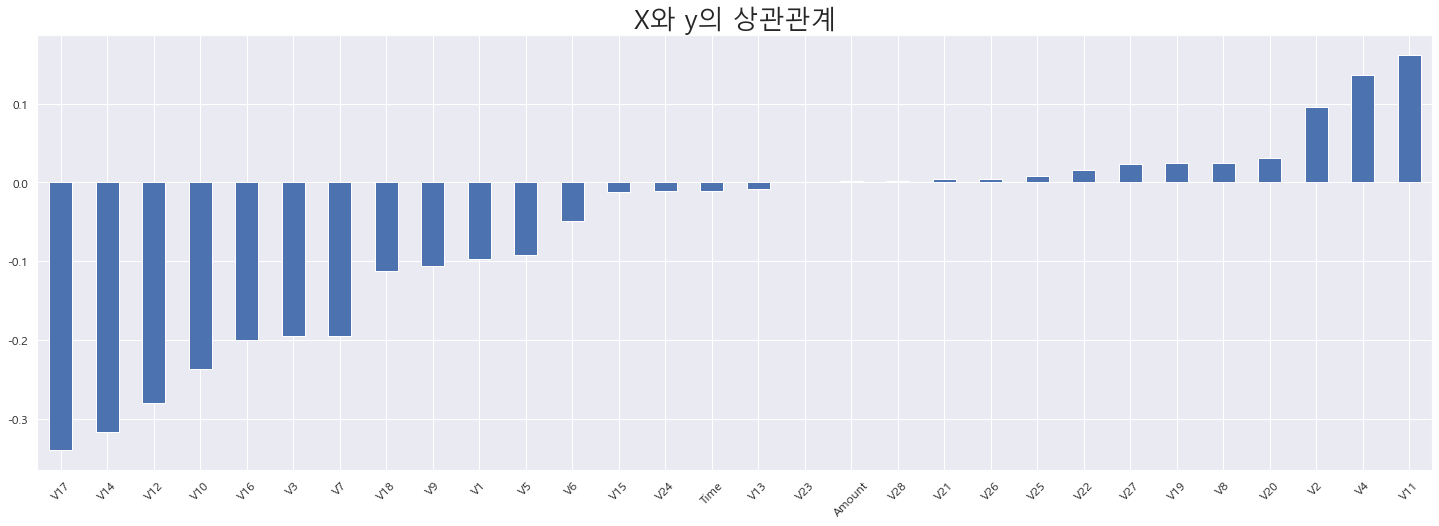

In [64]:
X = df.drop('target', axis=1)
y = df['target']
(X.corrwith(y).sort_values().plot.bar(figsize = (25, 8),
                                      fontsize = 12, rot = 45, grid = True))
plt.title('X와 y의 상관관계', fontsize = 26)

# VIF(variance_inflation_factor)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)

In [66]:
vif

,VIF Factor,features
0,1.001590,V24
1,1.001904,V26
2,1.003741,V13
3,1.004354,V16
4,1.006532,V18
5,1.008553,V17
6,1.011731,V12
7,1.014084,V15
8,1.014976,V25
9,1.023068,V28


# END

## Test with permutations the significance of a classification score
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_permutation_test_for_classification.html#sphx-glr-auto-examples-feature-selection-plot-permutation-test-for-classification-py

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
import numpy as np

n_uncorrelated_features = 100
rng = np.random.RandomState(seed=0)
# Use same number of samples as in iris and 2200 features
X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))

### Permutation test score
permutation_test_score generates a null distribution by calculating the accuracy of the classifier on 1000 different permutations of the dataset, where features remain the same but labels undergo different permutations. This is the distribution for the null hypothesis which states there is no dependency between the features and labels. An empirical p-value is then calculated as the percentage of permutations for which the score obtained is greater that the score obtained using the original data.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

clf = SVC(kernel='linear', random_state=7)
cv = StratifiedKFold(2, shuffle=True, random_state=0)

In [ ]:
score_iris, perm_scores_iris, pvalue_iris = permutation_test_score(clf, X, y, 
                                                                   scoring="accuracy", cv=cv, n_permutations=1000)

score_rand, perm_scores_rand, pvalue_rand = permutation_test_score(clf, X_rand, y, 
                                                                   scoring="accuracy", cv=cv, n_permutations=1000)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_iris, bins=20, density=True)
ax.axvline(score_iris, ls='--', color='r')
score_label = (f"Score on original\ndata: {score_iris:.2f}\n"
               f"(p-value: {pvalue_iris:.3f})")
#ax.text(0.7, 260, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")

In [ ]:
fig, ax = plt.subplots()

ax.hist(perm_scores_rand, bins=20, density=True)
#ax.set_xlim(0.13)
ax.axvline(score_rand, ls='--', color='r')
score_label = (f"Score on original\ndata: {score_rand:.2f}\n"
               f"(p-value: {pvalue_rand:.3f})")
#ax.text(0.14, 125, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
ax.set_ylabel("Probability")
plt.show()